In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import geopandas as gpd

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
%cd  'Progetto Covid Gruppo Horror'/
%ls

In [8]:
# Carico il dataset Comuni
df_comuni = pd.read_csv("comuni_clean.csv", sep=";")
# Carico il dataset Regione
df_regioni = pd.read_csv("covid19_region _python.csv", sep=";")
# Carico i dati geografici delle regioni italiane da un file shapefile
italy_regions = gpd.read_file("ITA_adm1_modified.shp")

In [9]:
#Gruppo Regione
Popolazione_tot_regione = df_comuni.groupby("Regione")["Popolazione2011"].sum()

In [11]:
#Decessi per regione
current_positive_regione = df_regioni.groupby("RegionName")["CurrentPositiveCases"].sum()
#proporzione
proporzione= (current_positive_regione/Popolazione_tot_regione)

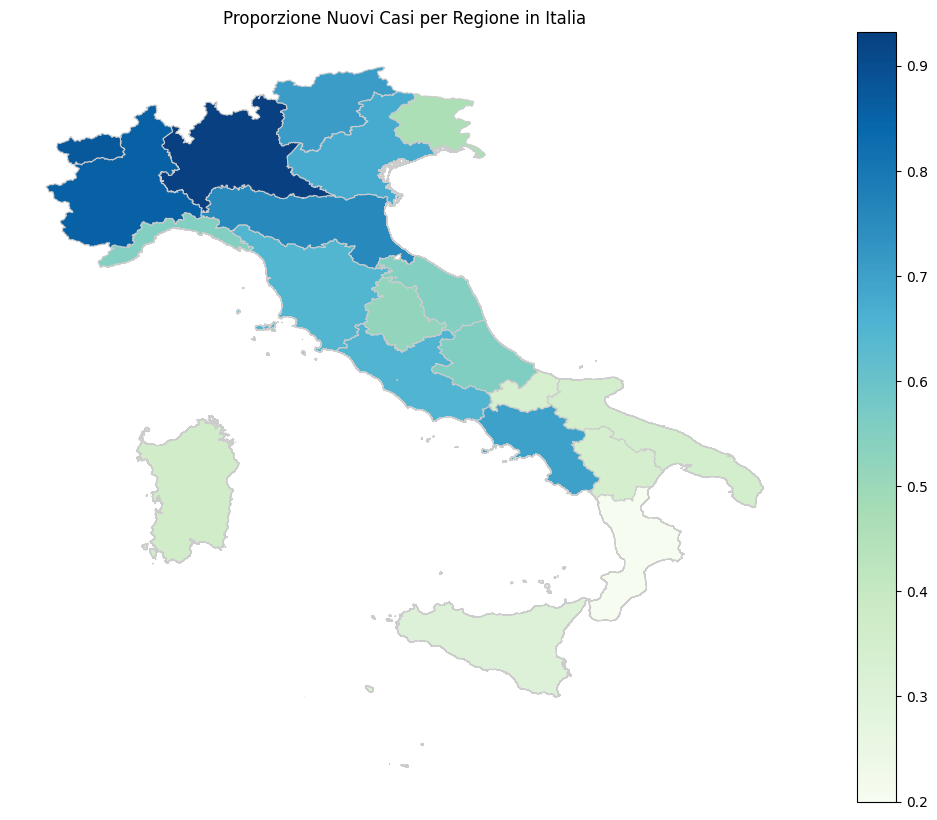

In [12]:
# Unione tra i dati geografici e la "proporzione"
italy_regions = italy_regions.merge(proporzione.reset_index(), left_on='NAME_1', right_on='RegionName', how='left')

# Creazione del grafico a mappa dell'Italia su base regionale
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

#Colorazione in base ai dati
italy_regions.plot(column=0, cmap='GnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Personalizzazione
ax.set_title('Proporzione Nuovi Casi per Regione in Italia')
ax.set_axis_off()
leg = ax.get_legend()

#Mostra
plt.show()